In [1]:
pip install stable-baselines3 pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip show stable-baselines3 pandas numpy

Name: stable-baselines3
Version: 1.5.0
Summary: Pytorch version of Stable Baselines, implementations of reinforcement learning algorithms.
Home-page: https://github.com/DLR-RM/stable-baselines3
Author: Antonin Raffin
Author-email: antonin.raffin@dlr.de
License: MIT
Location: c:\python310\lib\site-packages
Requires: cloudpickle, gym, matplotlib, numpy, pandas, torch
Required-by: 
---
Name: pandas
Version: 1.5.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\python310\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: gym-anytrading, gym-mtsim, stable-baselines3
---
Name: numpy
Version: 1.24.1
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: c:\python310\lib\site-packages


In [11]:

import numpy as np
import pandas as pd
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import CheckpointCallback

# ENV HERE


In [42]:


import gym
import gym_mtsim
import numpy as np
from gym import spaces

class TradingEnvironment(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, df):
        super(TradingEnvironment, self).__init__()
        
        self.df = df
        self.current_step = 0
        
        # Define action and observation spaces
        self.action_space = spaces.Discrete(3)  # Buy, hold, or sell
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(6,), dtype=np.float32)
        
    def reset(self):
        self.current_step = 0
        return self._next_observation()
    
    def step(self, action):
        self.current_step += 1
        
        if self.current_step >= len(self.df.index) - 1:
            done = True
        else:
            done = False
            
        obs = self._next_observation()
        reward = self._calculate_reward(action)
        
        return obs, reward, done, {}
    
    def _next_observation(self):
        return np.array(self.df.iloc[self.current_step].values)
    
    def _calculate_reward(self, action):
        # This is a simplified reward calculation. You should implement your own trading strategy and reward system.
        current_price = self.df.iloc[self.current_step]['Close']
        next_price = self.df.iloc[self.current_step + 1]['Close']
        
        if action == 0:  # Buy
            reward = next_price - current_price
        elif action == 1:  # Hold
            reward = 0
        elif action == 2:  # Sell
            reward = current_price - next_price
        else:
            raise ValueError("Invalid action")
            
        return reward
    
    def render(self, mode='human'):
        print(f"Current step: {self.current_step}, Date: {self.df.iloc[self.current_step]['Date']}")
        
    def close(self):
        pass

# SET DATA

In [43]:
# def load_historical_data(start_date, end_date):
    
#    sim.download_data(
#         symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
#         time_range=(
#             datetime(2021, 5, 5, tzinfo=pytz.UTC),
#             datetime(2021, 9, 5, tzinfo=pytz.UTC)
#         ),
#         timeframe=Timeframe.H1
           
#     )
#                 print(sim.download_data)
#     return time_range

# training_start_date = '2022-01-10'
# training_end_date = '2022-12-31'
# testing_start_date = '2023-01-01'
# testing_end_date = '2023-01-31'

# training_data = load_historical_data(start_date=training_start_date, end_date=training_end_date)
# testing_data = load_historical_data(start_date=testing_start_date, end_date=testing_end_date)

In [44]:
# training_env = DummyVecEnv([lambda: TradingEnvironment(training_data)])

In [61]:
pip install yfinance

     ---------------------------------------- 59.2/59.2 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 26.0 MB/s eta 0:00:00
     ---------------------------------------- 129.4/129.4 kB ? eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\sample.exe' -> 'C:\\Python310\\Scripts\\sample.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import pytz
import yfinance as yf
from datetime import datetime, timedelta


# def filter_data_by_date(data, start_date, end_date):
#     return data[(data['time'] >= start_date) & (data['time'] <= end_date)]

def load_historical_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=False,
)

if not sim.load_symbols(FOREX_DATA_PATH):
    sim.download_data(
        symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
        time_range=(
            datetime(2022, 10, 1, tzinfo=pytz.UTC),
            datetime(2022, 12, 31, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.H1
    )
    sim.save_symbols(FOREX_DATA_PATH)
    # Get the symbols you want to use for training and testing
symbol = 'EURUSD'

training_start_date = '2022-01-10'
training_end_date = '2022-12-31'
testing_start_date = '2023-01-01'
testing_end_date = '2023-01-31'

ticker = 'EURUSD=X'

# symbol_data = sim.get_symbol(symbol)

# training_data = filter_data_by_date(symbol_data, training_start_date, training_end_date)
# testing_data = filter_data_by_date(symbol_data, testing_start_date, testing_end_date)

training_data = load_historical_data(ticker, training_start_date, training_end_date)
testing_data = load_historical_data(ticker, testing_start_date, testing_end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# create env for training

In [165]:
from gym_mtsim import MtSimulator, OrderType, Timeframe, FOREX_DATA_PATH, MtEnv
sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=True,
    symbols_filename=FOREX_DATA_PATH
)
print(FOREX_DATA_PATH)
if not sim.load_symbols("FOREX_DATA_PATH"):
    sim.download_data(
        symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
        time_range=(
            datetime(2022, 10, 1, tzinfo=pytz.UTC),
            datetime(2022, 12, 31, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.H4
    )
    sim.save_symbols(FOREX_DATA_PATH)

training_env = MtEnv(
    original_simulator=sim,
    trading_symbols=['GBPCAD', 'EURUSD', 'USDJPY'],
    window_size=10,
    hold_threshold=0.5,
    close_threshold=0.5,
    fee=lambda symbol: {
        'GBPCAD': max(0., np.random.normal(0.0007, 0.00005)),
        'EURUSD': max(0., np.random.normal(0.0002, 0.00003)),
        'USDJPY': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=2
)

# training_env = gym.make('forex-hedge-v0', env=training_env)

# training_env = gym.make('forex-hedge-v0')
# training_env = DummyVecEnv([lambda: training_env])

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\gym_mtsim\data\symbols_forex.pkl


# train model using stable baseline

In [295]:
model = A2C('MultiInputPolicy', training_env, verbose=1)
# checkpoint_callback = CheckpointCallback(save_freq=10000, save_path='./checkpoints/')
# model.learn(total_timesteps=200000, callback=checkpoint_callback)

# model.save("path/to/save/your/trained/model")
model.save("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/models/A2C_test_200005")
# model = A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/models/A2C_test_200005")
# model = A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/checkpoints/rl_model_9502_steps.zip")
# model = A2C.load("path/to/load/your/trained/model")

observation = training_env.reset()
while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = training_env.step(action)
    if done:
        break
print("FIN")        

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
FIN


# TEST MODEL ON TEST DATA

In [266]:
# # testing_env = gym.make('forex-hedge-v0')
# testing_env = DummyVecEnv([lambda: testing_env])

# mean_reward, std_reward = evaluate_policy(model, testing_env, n_eval_episodes=10)
# print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# trainied model data

In [299]:
state = training_env.render()
# state = sim.get_state()
print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 10653.212345479702, equity: 10819.8532291324, margin: 3395.867229382535
free_margin: 7423.985999749866, margin_level: 3.1861826448139974



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,531,GBPCAD,Buy,0.87,2022-12-30 16:00:00+00:00,1.63681,2022-12-30 20:00:00+00:00,1.63275,-308.005422,1052.509793,0.000732,False
1,530,USDJPY,Sell,0.62,2022-12-30 12:00:00+00:00,131.90300,2022-12-30 20:00:00+00:00,130.97700,428.110117,620.000000,0.021604,False
2,529,GBPCAD,Buy,1.43,2022-12-30 12:00:00+00:00,1.63167,2022-12-30 20:00:00+00:00,1.63275,46.536189,1723.357436,0.000640,False
3,528,GBPCAD,Buy,0.84,2022-12-30 08:00:00+00:00,1.63002,2022-12-30 12:00:00+00:00,1.63167,60.220239,1010.618897,0.000679,True
4,525,USDJPY,Buy,1.34,2022-12-29 16:00:00+00:00,133.03400,2022-12-30 08:00:00+00:00,132.12300,-943.081831,1340.000000,0.018872,True
...,...,...,...,...,...,...,...,...,...,...,...,...
526,7,GBPCAD,Sell,1.42,2022-10-05 00:00:00+00:00,1.54698,2022-10-05 04:00:00+00:00,1.54741,-114.012807,1624.282102,0.000657,True
527,5,USDJPY,Sell,1.93,2022-10-04 16:00:00+00:00,144.22900,2022-10-05 00:00:00+00:00,143.84900,485.625209,1930.000000,0.018048,True
528,4,EURUSD,Sell,1.42,2022-10-04 16:00:00+00:00,0.99702,2022-10-05 00:00:00+00:00,0.99761,-107.940349,1415.768400,0.000170,True
529,3,GBPCAD,Sell,0.34,2022-10-04 16:00:00+00:00,1.55305,2022-10-04 20:00:00+00:00,1.55010,56.463191,389.425048,0.000706,True


C:\Python310\lib\site-packages\matplotlib\axis.py:125: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



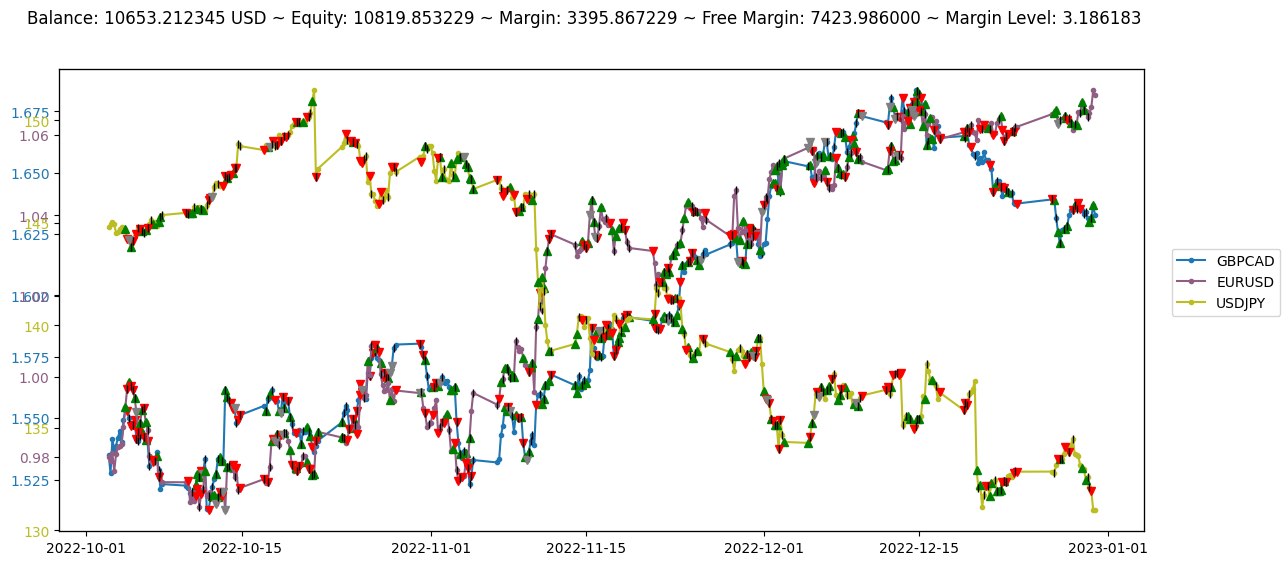

In [300]:



training_env.render('simple_figure')
# testing_env.render('simple_figure')
# training_env('advanced_figure', time_format="%Y-%m-%d")
training_env.render('advanced_figure', time_format="%Y-%m-%d")
# testing_env.render('advanced_figure', time_format="%Y-%m-%d")

# create env for training & load_model

In [302]:

# initial_equity = 10
# margin_level = 0.2

# required_balance = initial_equity / (1 - margin_level)

sim = MtSimulator(
    unit='USD',
    balance=300,
    leverage=100,
    stop_out_level=0.05,
#     margin_level=0.2,
    hedge=True,
    symbols_filename=FOREX_DATA_PATH,
#     equity=10
)
print(FOREX_DATA_PATH)
if not sim.load_symbols("FOREX_DATA_PATH"):
    sim.download_data(
        symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
        time_range=(
            datetime(2023, 1, 1, tzinfo=pytz.UTC),
            datetime(2023, 1, 31, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.H4
    )
    sim.save_symbols(FOREX_DATA_PATH)

testing_env = MtEnv(
#     equity=10,
    original_simulator=sim,
    trading_symbols=['GBPCAD', 'EURUSD', 'USDJPY'],
    window_size=10,
#     hold_threshold=0.5,
    hold_threshold=1,
    close_threshold=0.5,
    fee=lambda symbol: {
        'GBPCAD': max(0., np.random.normal(0.0007, 0.00005)),
        'EURUSD': max(0., np.random.normal(0.0002, 0.00003)),
        'USDJPY': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=2
)

model = A2C('MultiInputPolicy', testing_env, verbose=1)
model = A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/models/A2C_test_200005")
# model = A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/checkpoints/rl_model_1_steps.zip")
# model = A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/models/A2C_test_200005.zip")
print(model)
observation_test = testing_env.reset()
while True:
    action, _states = model.predict(observation_test)
    observation_test, reward, done, info = testing_env.step(action)
    if done:
        break

state = testing_env.render()
#state = sim.get_state()
print(
    f"balance: {state['balance']}, equity: {state['equity']},  margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\gym_mtsim\data\symbols_forex.pkl
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
balance: 750.0287869661853, equity: 750.0287869661853,  margin: -2.4158453015843406e-13
free_margin: 750.0287869661855, margin_level: inf



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,98,USDJPY,Buy,0.08,2023-01-31 08:00:00+00:00,130.39200,2023-01-31 20:00:00+00:00,130.10100,-19.126809,80.000000,0.020052,True
1,100,USDJPY,Sell,0.30,2023-01-31 12:00:00+00:00,129.89200,2023-01-31 16:00:00+00:00,130.19600,-74.965810,300.000000,0.021342,True
2,99,EURUSD,Buy,0.12,2023-01-31 12:00:00+00:00,1.08511,2023-01-31 16:00:00+00:00,1.08654,14.846567,130.213200,0.000193,True
3,96,GBPCAD,Sell,0.11,2023-01-31 04:00:00+00:00,1.65562,2023-01-31 12:00:00+00:00,1.65221,21.824322,135.713636,0.000749,True
4,97,USDJPY,Buy,0.55,2023-01-31 04:00:00+00:00,130.18600,2023-01-31 08:00:00+00:00,130.39200,78.571841,550.000000,0.019725,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,USDJPY,Buy,0.08,2023-01-04 12:00:00+00:00,130.71000,2023-01-05 00:00:00+00:00,131.97100,75.125632,80.000000,0.021699,True
96,4,GBPCAD,Sell,0.17,2023-01-04 08:00:00+00:00,1.63482,2023-01-04 16:00:00+00:00,1.62725,87.104801,205.011249,0.000659,True
97,3,GBPCAD,Sell,0.21,2023-01-04 04:00:00+00:00,1.63532,2023-01-04 08:00:00+00:00,1.63482,-3.621338,251.655907,0.000734,True
98,1,USDJPY,Buy,0.01,2023-01-03 12:00:00+00:00,130.65500,2023-01-04 00:00:00+00:00,130.64600,-0.221872,10.000000,0.019987,True


# test model data

C:\Python310\lib\site-packages\matplotlib\axis.py:125: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



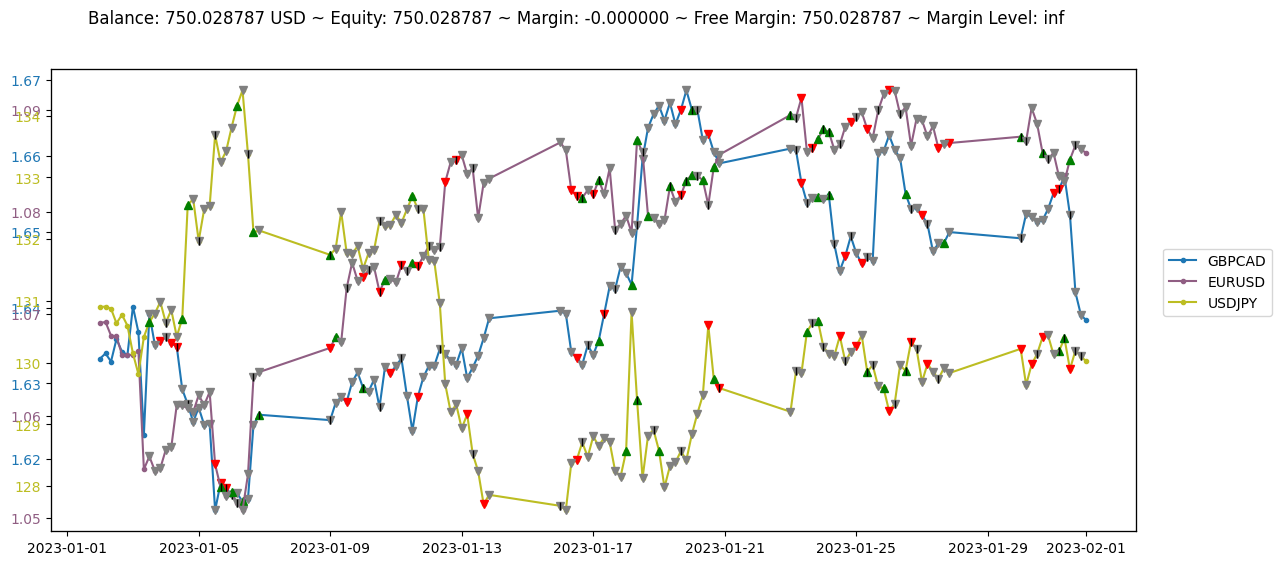

In [303]:
# training_env.render('simple_figure')

# training_env('advanced_figure', time_format="%Y-%m-%d")
# testing_env.render('advanced_figure', time_format="%Y-%m-%d")
testing_env.render('advanced_figure', time_format="%Y-%m-%d")